<a href="https://colab.research.google.com/github/markcastorm/Water_Quality_Analysis-and-Prediction/blob/main/Water_Quality_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"markcastor","key":"c89c3a106452dd7c23c1050f6546392c"}'}

In [ ]:
 #create a kaggle data folder
 ! mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
#copy the kaggle file to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#permissions for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#to list the datasets
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-24 09:20:05           9898  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6080  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2258  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2502  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [ ]:
  !kaggle datasets download -d adityakadiwal/water-potability

water-potability.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip water-potability.zip

Archive:  water-potability.zip
replace water_potability.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: water_potability.csv    


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [ ]:
df = pd.read_csv("water_potability.csv")

In [ ]:
df.head(n=5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


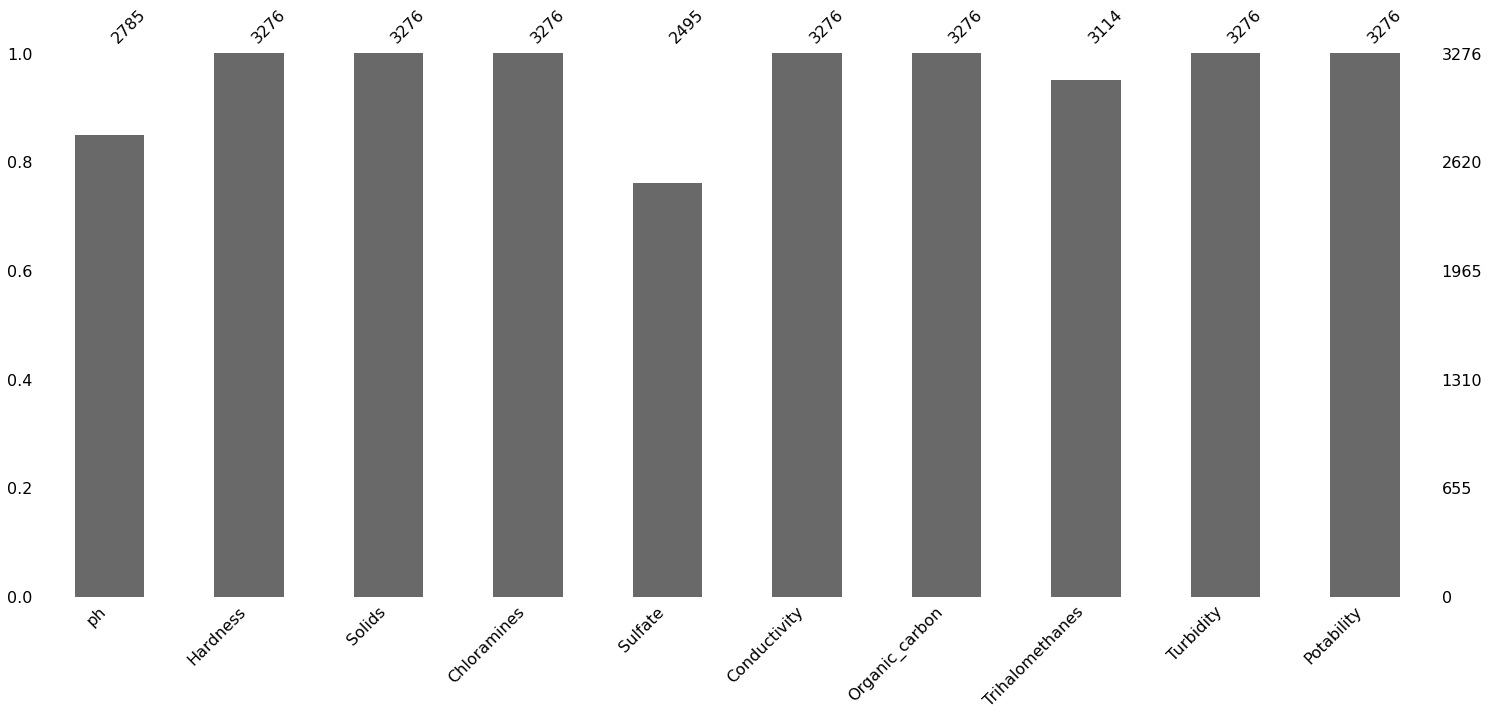

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

#Exploratory Data Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.shape

(3276, 10)

#Handling Missing Data

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#Removing Duplicates

In [ ]:
df.duplicated().sum()

0

#Data visualization

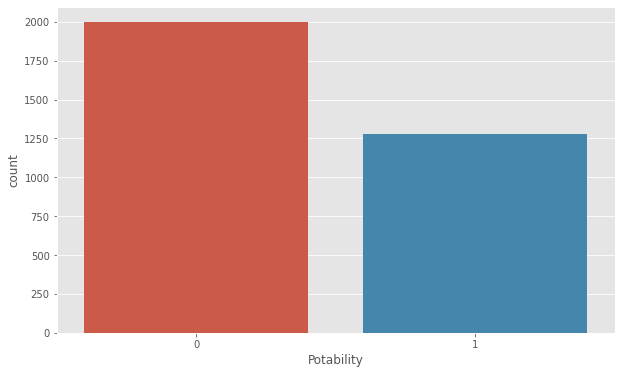

In [ ]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.countplot(x='Potability', data=df )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

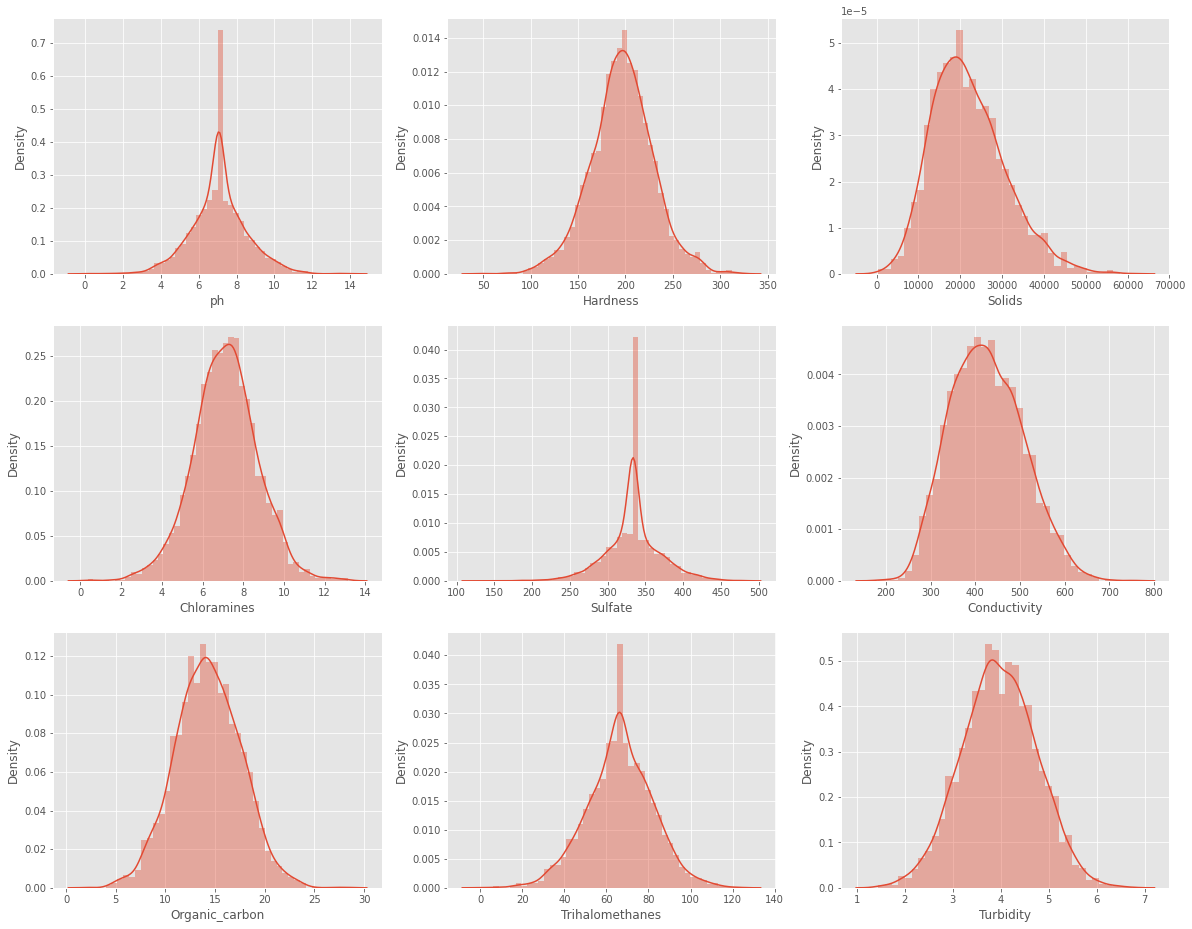

In [ ]:
plt.figure(figsize=(20,16))
ddf=df.drop('Potability',axis=True)
for i,column in enumerate(ddf.columns,1):
    plt.subplot(3,3,i)
    sns.distplot(ddf[column],hist=True)
plt.show()

<Figure size 1440x1152 with 0 Axes>

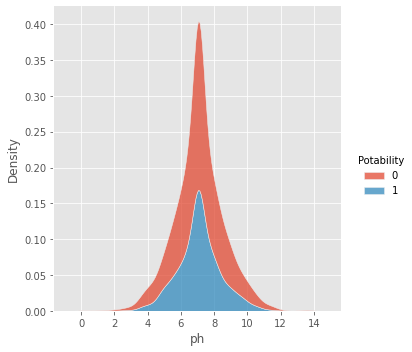

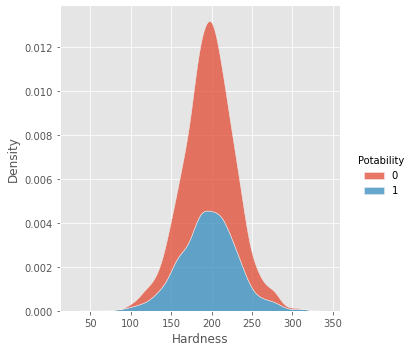

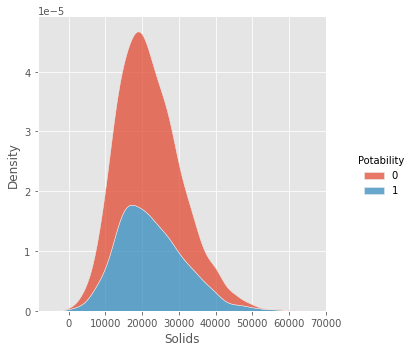

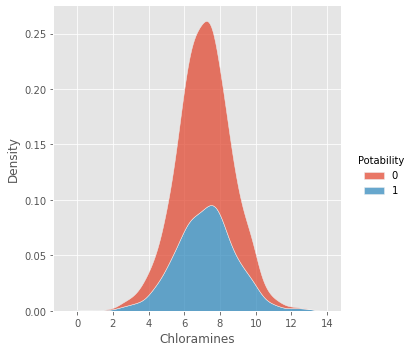

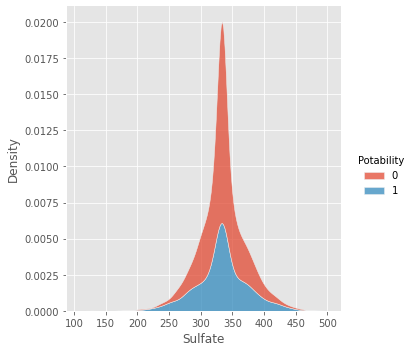

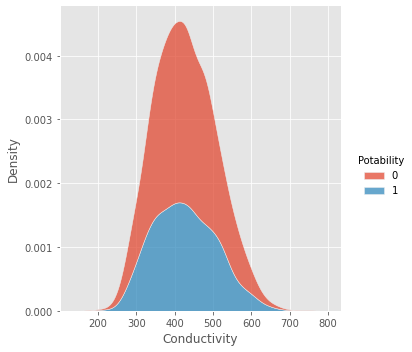

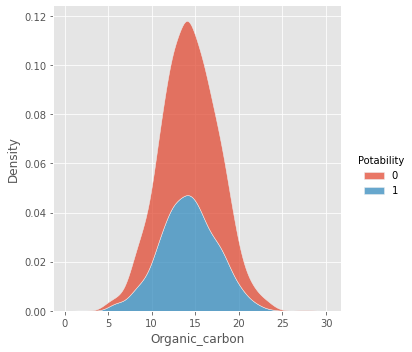

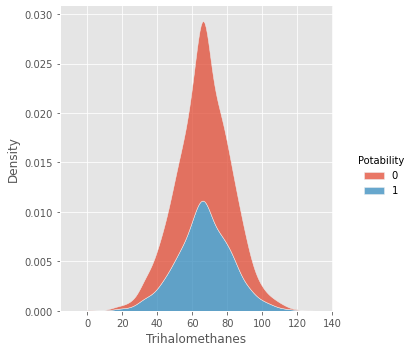

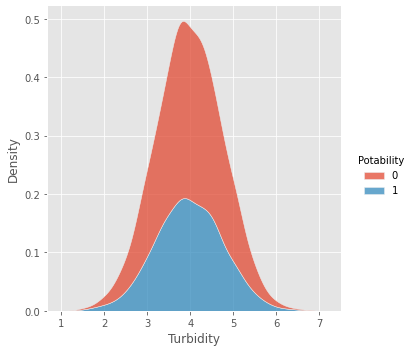

In [ ]:
plt.figure(figsize=(20,16))
for i, column in enumerate(ddf.columns,1):
  sns.displot(df, x=ddf[column], hue="Potability", kind="kde", multiple="stack")
plt.show()

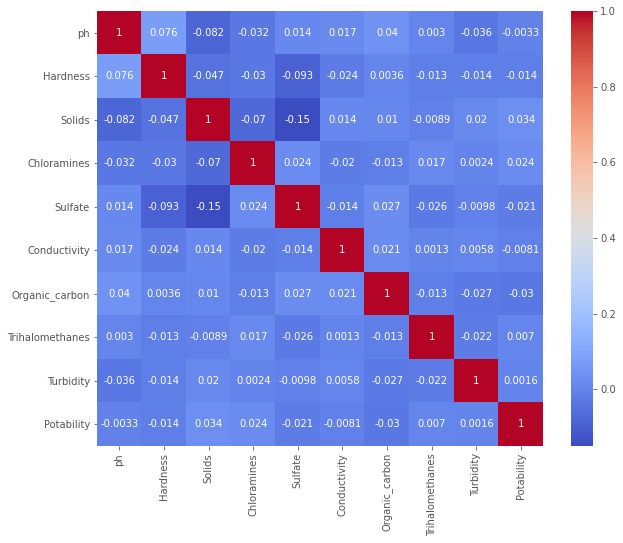

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

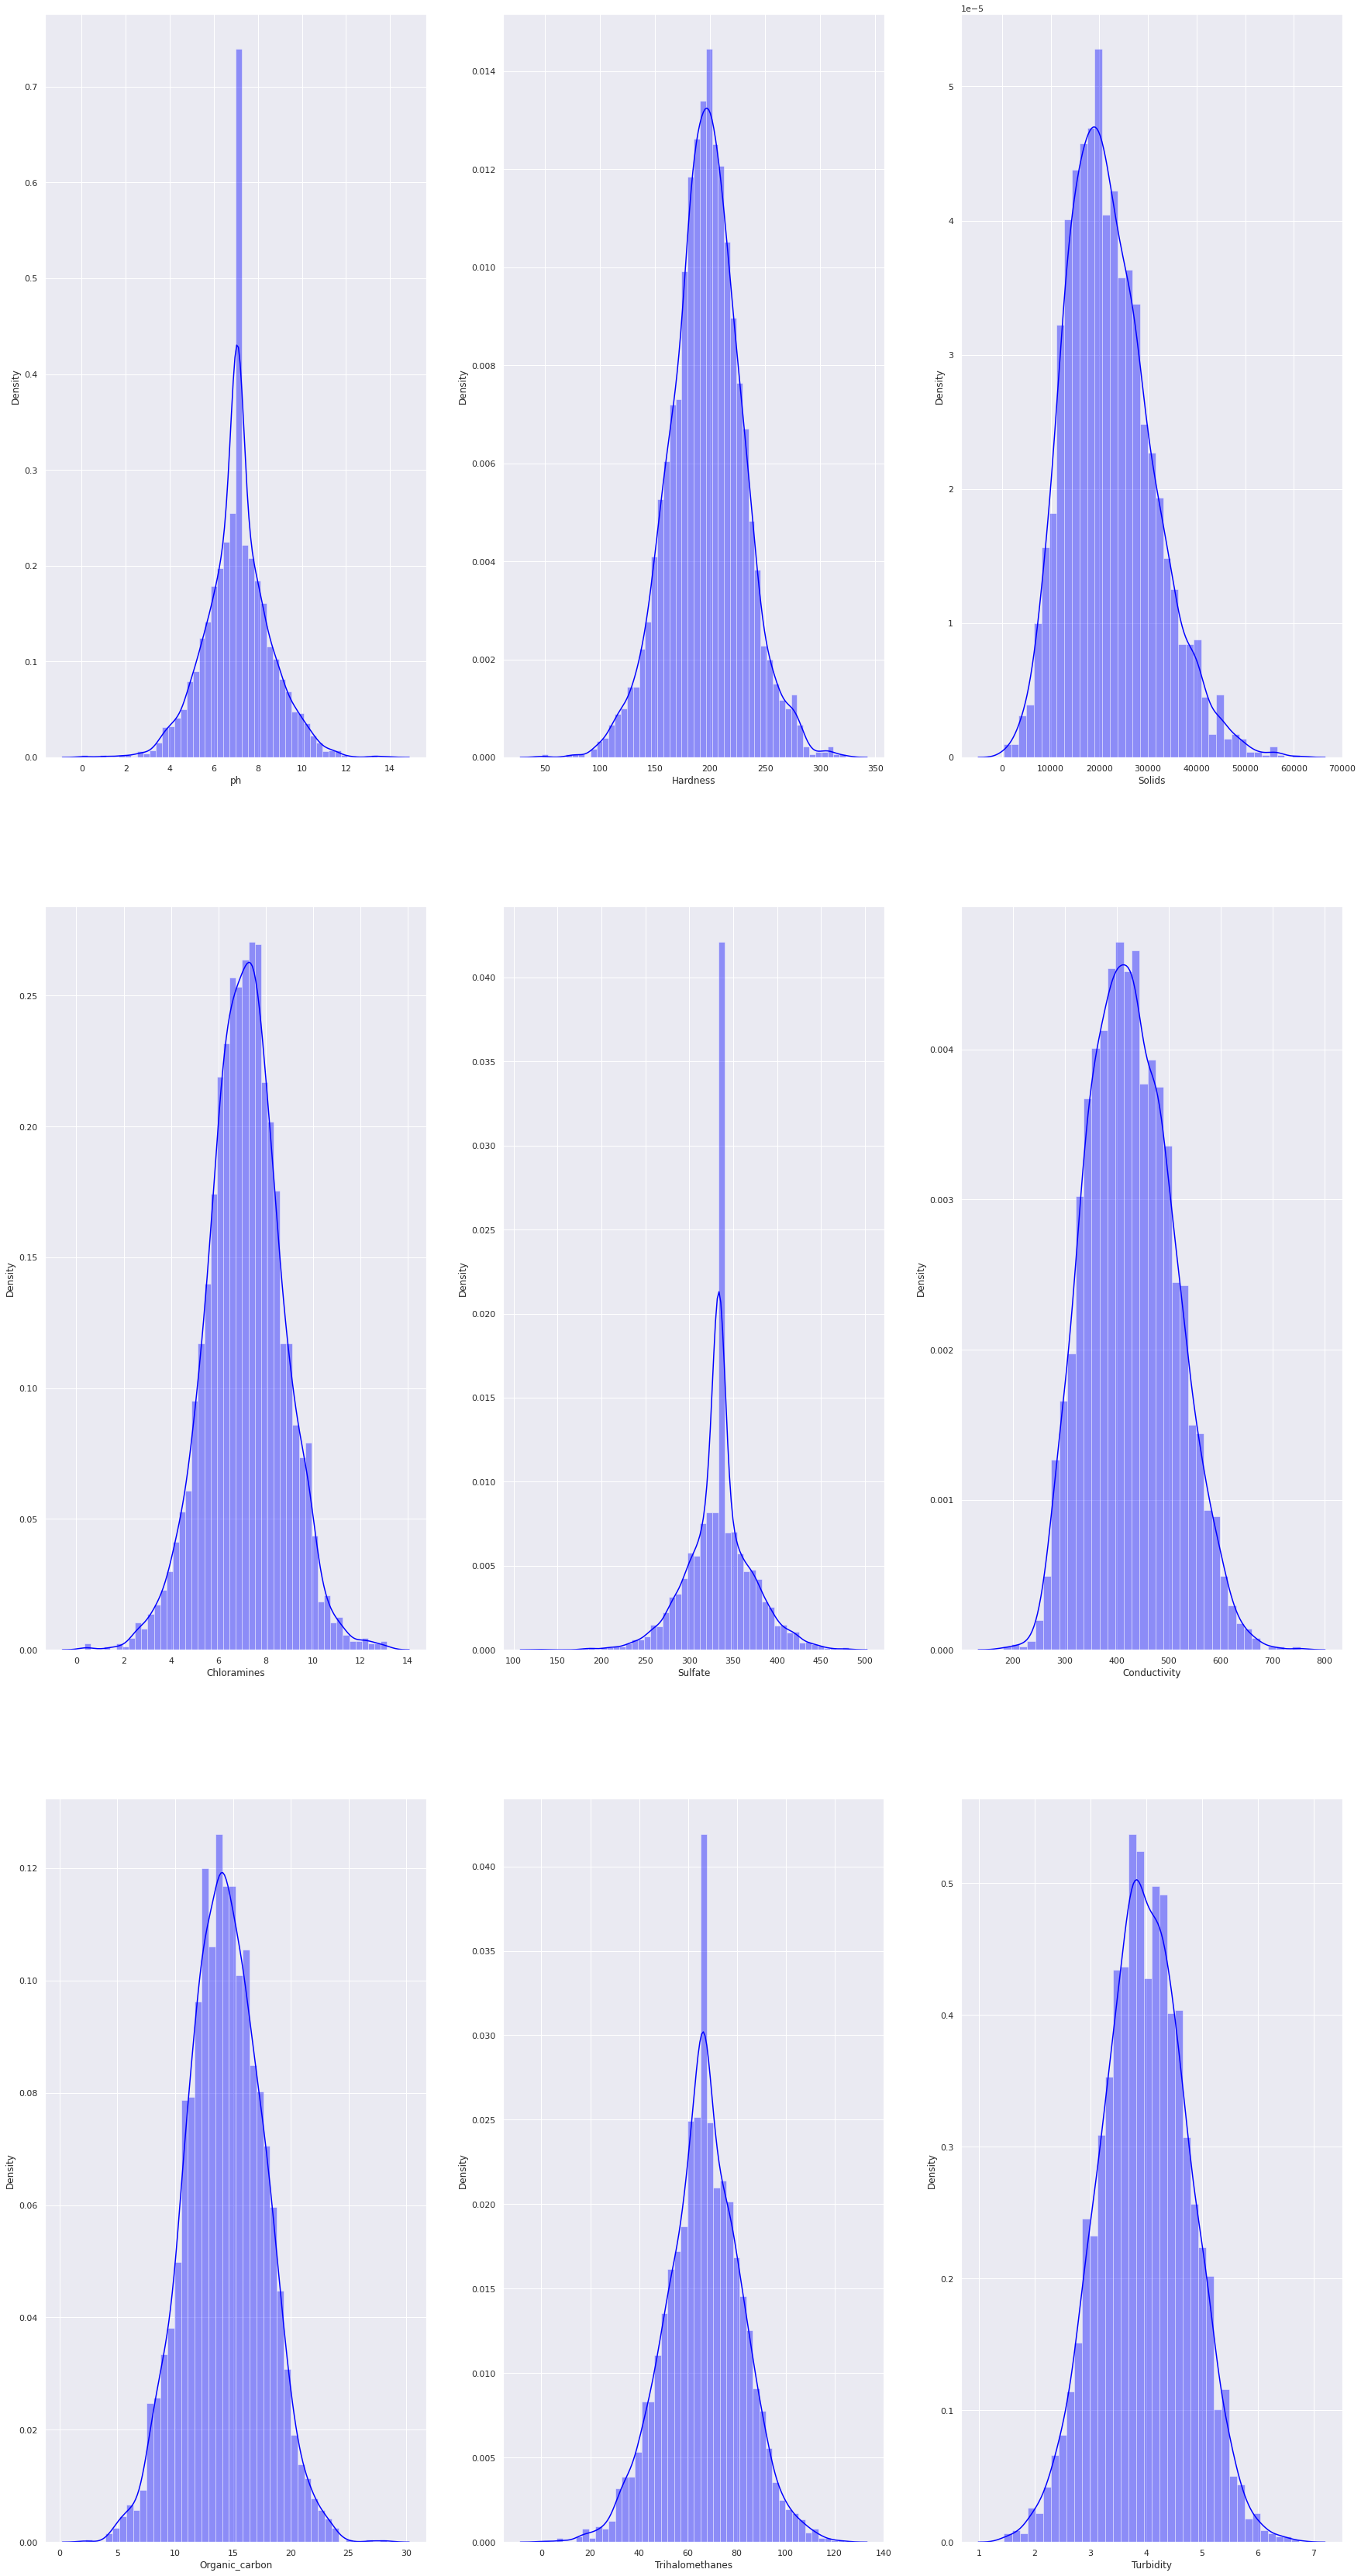

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(30, 60))
for i,column in enumerate(ddf.columns,1):

    plt.subplot(3,3,i)
    sns.distplot(ddf[column],color="blue", kde=True)
plt.show()


##Outlier Treatment

Outlier visualize


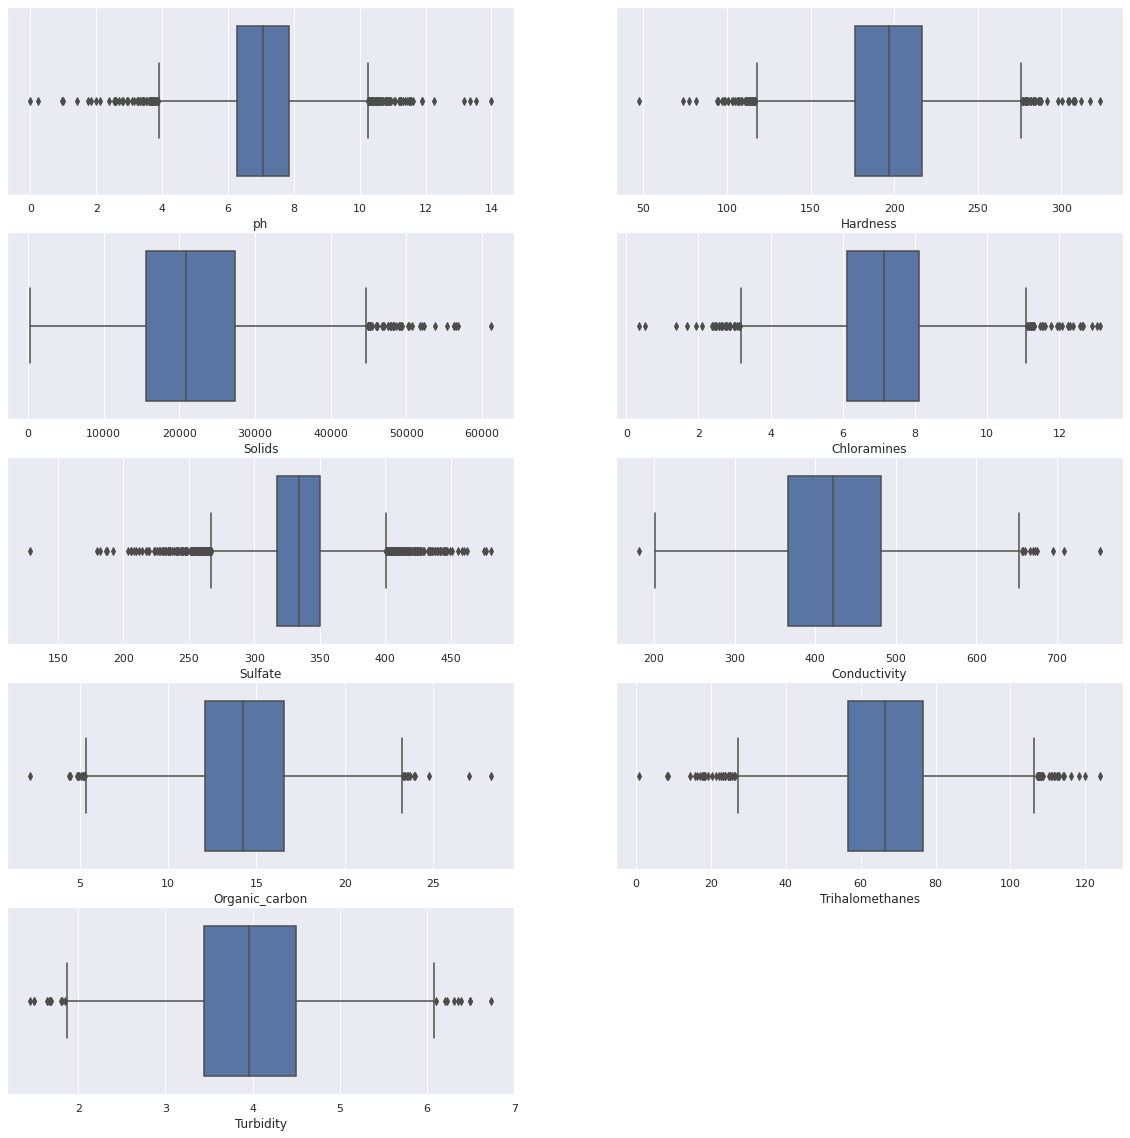

In [ ]:
plt.figure(figsize=(20,20))
for i, column in enumerate(ddf.columns, 1):
  plt.subplot(5,2,i)
  sns.boxplot(data = ddf, x = ddf[column],orient = 'h')
plt.show()


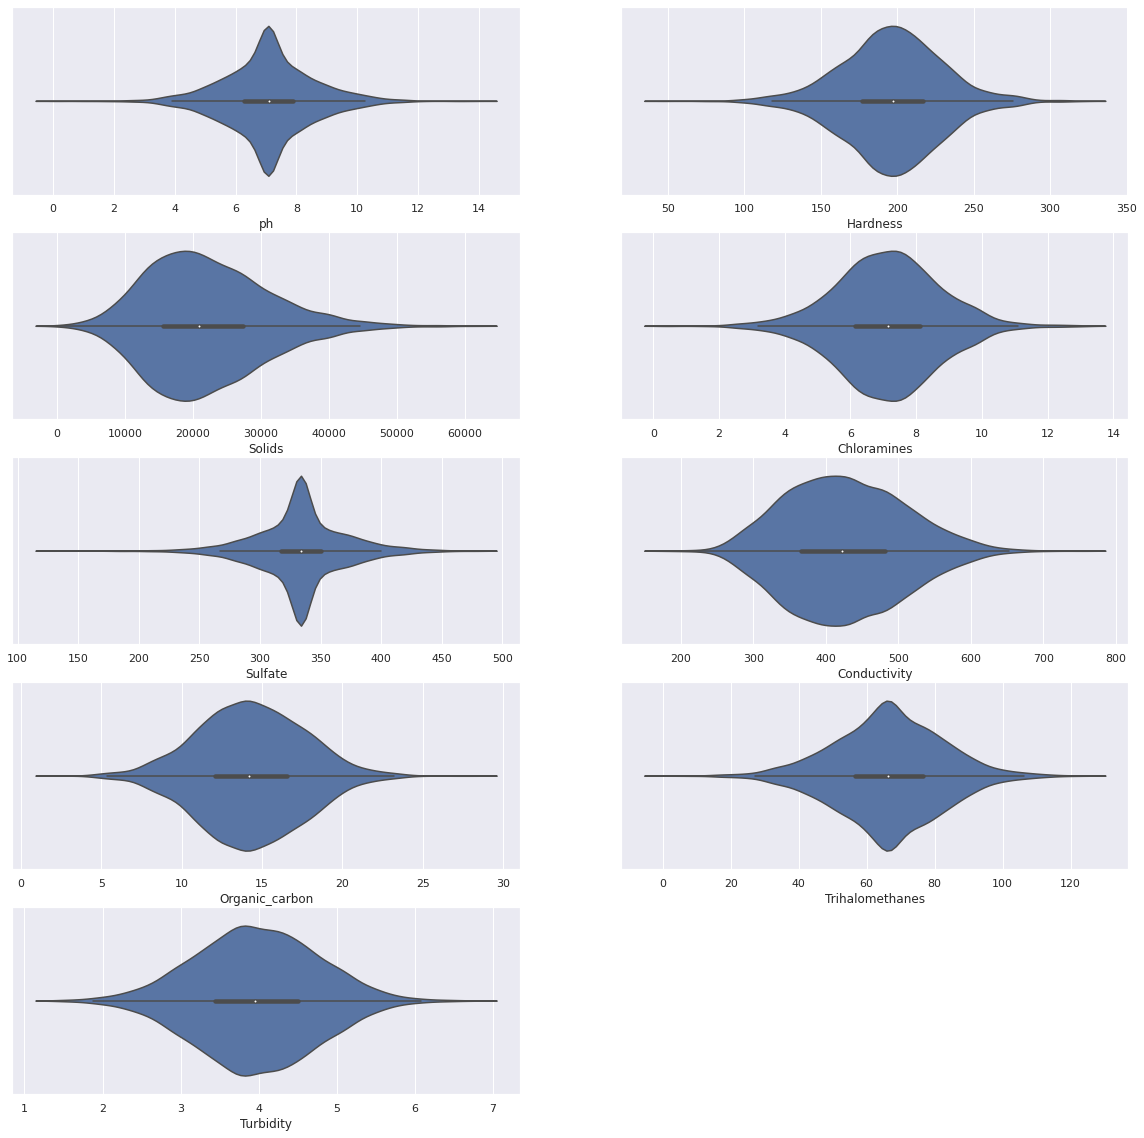

In [ ]:
plt.figure(figsize=(20,20))
for i ,column in enumerate (ddf.columns, 1):
  plt.subplot(5,2,i)
  sns.violinplot(data = ddf, x = ddf[column], orient = 'h')
plt.show()

#Outlier prevention

In [ ]:
from scipy import stats
zscore = np.abs(stats.zscore(df))
print(zscore)

[[8.46038683e-15 2.59194711e-01 1.39470871e-01 ... 1.30614943e+00
  1.28629758e+00 7.99774743e-01]
 [2.28933938e+00 2.03641367e+00 3.85986650e-01 ... 6.38479983e-01
  6.84217891e-01 7.99774743e-01]
 [6.92867789e-01 8.47664833e-01 2.40047337e-01 ... 1.50940884e-03
  1.16736546e+00 7.99774743e-01]
 ...
 [1.59125368e+00 6.26829230e-01 1.27080989e+00 ... 2.18748247e-01
  8.56006782e-01 1.25035206e+00]
 [1.32951593e+00 1.04135450e+00 1.14405809e+00 ... 7.03468419e-01
  9.50797383e-01 1.25035206e+00]
 [5.40150905e-01 3.85462310e-02 5.25811937e-01 ... 7.80223466e-01
  2.12445866e+00 1.25035206e+00]]


In [ ]:
threshold = 2.5
print(np.where(zscore > 2.5))

(array([   9,   18,   29,   37,   43,   51,   61,   66,   67,   80,   88,
        104,  112,  113,  118,  119,  126,  128,  128,  130,  133,  140,
        142,  149,  156,  180,  186,  187,  189,  204,  204,  215,  227,
        227,  227,  245,  246,  253,  258,  260,  262,  263,  263,  264,
        267,  272,  272,  274,  275,  275,  275,  278,  278,  283,  284,
        285,  287,  287,  295,  304,  309,  310,  310,  313,  317,  317,
        320,  321,  324,  330,  333,  335,  342,  342,  345,  347,  350,
        351,  351,  354,  354,  356,  357,  365,  366,  366,  374,  377,
        378,  379,  382,  383,  383,  385,  398,  400,  405,  405,  408,
        408,  420,  434,  437,  454,  456,  475,  492,  498,  509,  515,
        516,  517,  518,  521,  531,  534,  546,  549,  550,  558,  583,
        593,  605,  608,  613,  630,  648,  651,  666,  666,  666,  680,
        683,  692,  698,  698,  698,  703,  719,  726,  738,  747,  748,
        756,  757,  772,  781,  782,  783,  785,  

In [ ]:
df_clean=df
df_clean = df_clean[(zscore<2.5).all(axis=1)]

In [ ]:
df.shape, df_clean.shape

((3276, 10), (2825, 10))

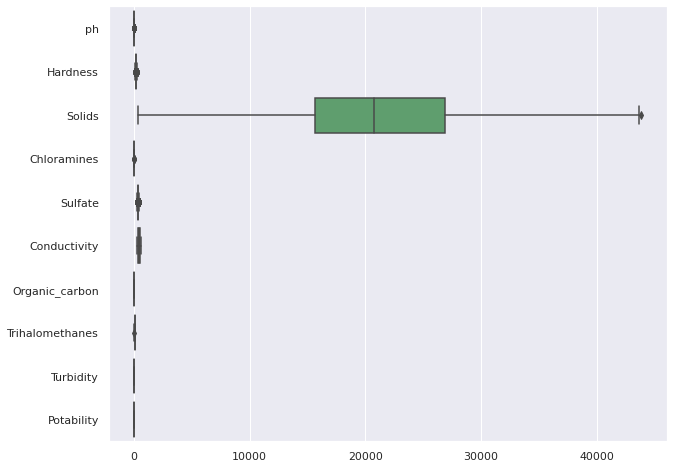

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(data=df_clean, orient='h')

In [ ]:
x = df.drop(['Potability'],axis=True)
y = df['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=101)

#Normalizing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mscale=MinMaxScaler()
mscale.fit_transform(x_train)
mscale.fit_transform(x_test)

array([[0.40969454, 0.36217554, 0.44179161, ..., 0.36487918, 0.66386906,
        0.66897498],
       [0.60322994, 0.66191929, 0.50641783, ..., 0.40502915, 0.52847171,
        0.6012721 ],
       [0.48121458, 0.62595746, 0.4298068 , ..., 0.06714955, 0.0656494 ,
        0.5324917 ],
       ...,
       [0.50577104, 0.40516913, 0.47997837, ..., 0.47548868, 0.66190164,
        0.32563978],
       [0.54368642, 0.63514636, 0.43642336, ..., 0.56602519, 0.59716891,
        0.2900212 ],
       [0.63447746, 0.26484704, 0.07404069, ..., 0.65356761, 0.17299454,
        0.48455439]])

#Models

###LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

log_acc=accuracy_score(y_test, log_reg.predict(x_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,log_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,log_reg.predict(x_test))*100))

Train Set Accuracy:60.91603053435114
Test Set Accuracy:61.28048780487805


Accuracy on test set: 61.280%
F1-Score on test set: 0.000
-------------------- confusion matrix --------------------


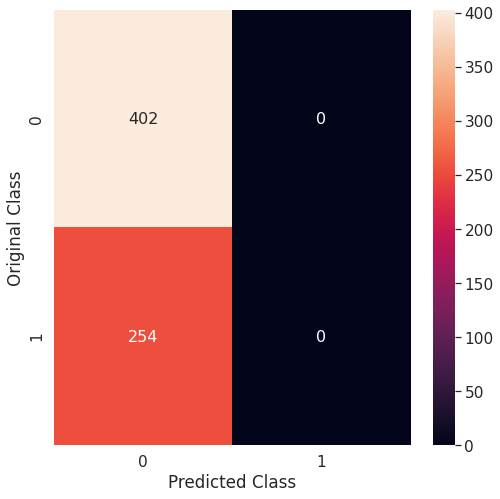

In [ ]:


y_pred=log_reg.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()





#DecisionTreeClassifier

In [ ]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)

d_acc=accuracy_score(y_test, d_tree.predict(x_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train, d_tree.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test, d_tree.predict(x_test))*100))

Train Set Accuracy:100.0
Test Set Accuracy:57.3170731707317


Accuracy on test set: 57.317%
F1-Score on test set: 0.451
-------------------- confusion matrix --------------------


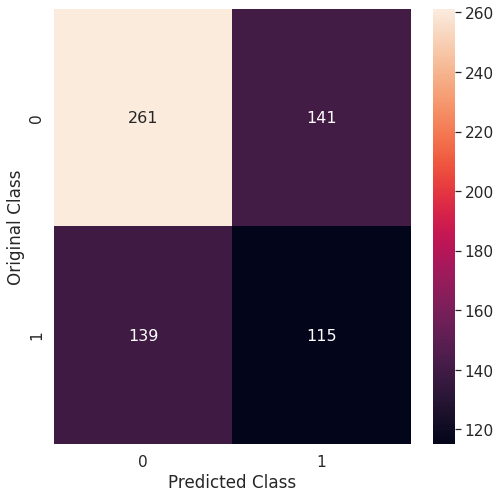

In [ ]:
y_pred=d_tree.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

##RandomForestClassifier

In [ ]:
r_for = RandomForestClassifier()
r_for.fit(x_train,y_train)

r_acc= accuracy_score(y_test,r_for.predict(x_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,r_for.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,r_for.predict(x_test))*100))

Train Set Accuracy:100.0
Test Set Accuracy:69.8170731707317


Accuracy on test set: 69.817%
F1-Score on test set: 0.510
-------------------- confusion matrix --------------------


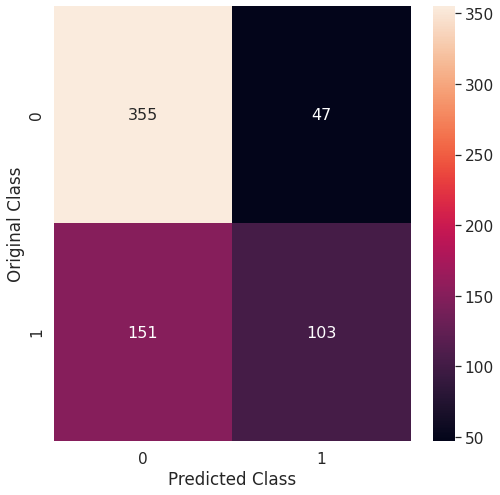

In [ ]:
y_pred=r_for.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

#KNeighborsClassifier

In [ ]:
k_nei = KNeighborsClassifier()
k_nei.fit(x_train,y_train)

k_acc = accuracy_score(y_test,k_nei.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,k_nei.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,k_nei.predict(x_test))*100))

Train set Accuracy:70.41984732824427
Test Set Accuracy:57.012195121951216


Accuracy on test set: 57.012%
F1-Score on test set: 0.344
-------------------- confusion matrix --------------------


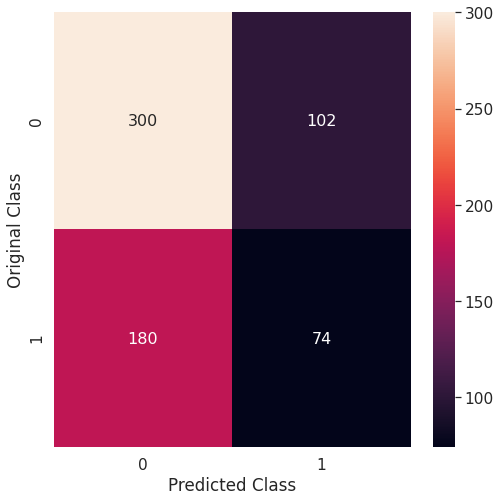

In [ ]:
y_pred=k_nei.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

##SVC

In [ ]:
s_vec = SVC()
s_vec.fit(x_train,y_train)

s_acc = accuracy_score(y_test,s_vec.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,s_vec.predict(x_train))*100))
print("Test set Accuracy:"+str(accuracy_score(y_test,s_vec.predict(x_test))*100))

Train set Accuracy:60.91603053435114
Test set Accuracy:61.28048780487805


Accuracy on test set: 61.280%
F1-Score on test set: 0.000
-------------------- confusion matrix --------------------


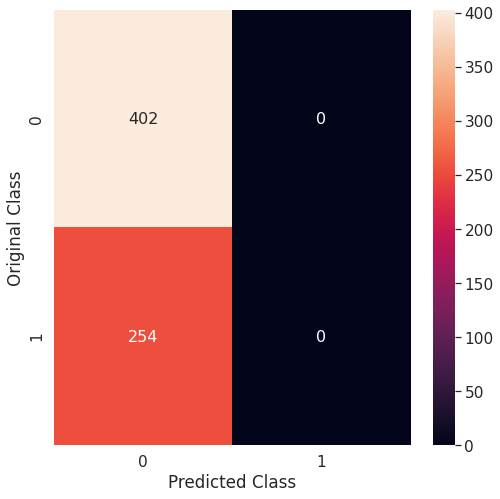

In [ ]:
y_pred=s_vec.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

##GaussianNB

In [ ]:
g_clf = GaussianNB()
g_clf.fit(x_train, y_train)

g_acc = accuracy_score(y_test, s_vec.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,g_clf.predict(x_train))*100))
print("Test set Accuracy:"+str(accuracy_score(y_test,g_clf.predict(x_test))*100))

Train set Accuracy:62.328244274809165
Test set Accuracy:64.63414634146342


Accuracy on test set: 64.634%
F1-Score on test set: 0.345
-------------------- confusion matrix --------------------


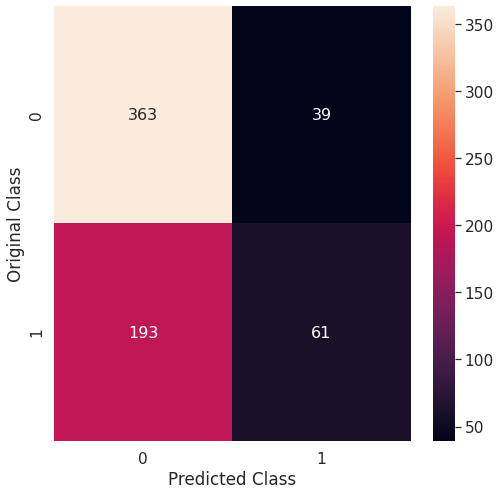

In [ ]:
y_pred=g_clf.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

##GridSearchCV RandomClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
nEstimator = [10,11,12,13,14,15,16]
depth = [5,10,20,30,40,50,60]
criterion= ['entropy', 'gini']
min_samples_leaf=[1,2,5,10]
min_samples_split=[2,5,10,15]
max_features = ['auto','sqrt', 'log2']

RF = RandomForestClassifier()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth,'criterion':criterion,'max_features': max_features,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split}]
gsv = GridSearchCV(RF, hyperParam,cv=5, verbose=1, scoring='f1_weighted', n_jobs=-1)
gsv.fit(x_train,y_train)
print("Best HyperParameter:",gsv.best_params_)
print(gsv.best_score_)

Fitting 5 folds for each of 4704 candidates, totalling 23520 fits
Best HyperParameter: {'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 16}
0.6404825801264579


Accuracy on test set: 64.787%
F1-Score on test set: 0.443
-------------------- confusion matrix --------------------


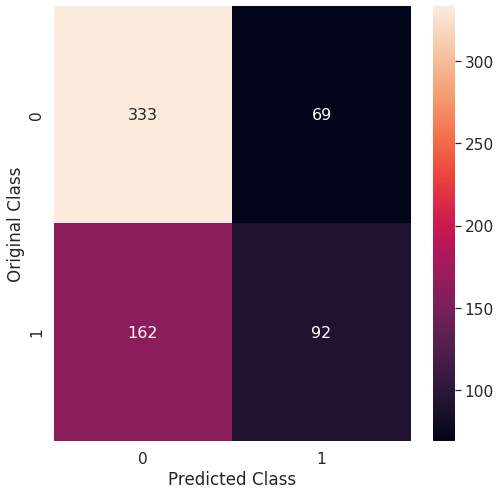

In [ ]:

GS_acc = accuracy_score(y_test,gsv.predict(x_test))
y_pred=gsv.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()



#RandomSearchcv
#RandomForestClassifier

In [ ]:
!pip install -U scikit-learn


In [ ]:



from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
nEstimator = [10,11,12,13,14,15,16,17,18]
depth = [5,10,20,30,40,50,60]
criterion=['entropy', 'gini']
min_samples_leaf=[1, 2, 5, 10,12,14]
min_samples_split=[2, 5, 10, 15,16,17]
max_features = ['auto', 'sqrt','log2']

RF = RandomForestClassifier()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth,'criterion':criterion,'max_features': max_features,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split}]
rsv = RandomizedSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
rsv.fit(x_train,y_train)
print("Best HyperParameter: ",rsv.best_params_)
print(rsv.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best HyperParameter:  {'n_estimators': 13, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 60, 'criterion': 'entropy'}
0.6143144828730722


Accuracy on test set: 65.549%
F1-Score on test set: 0.421
-------------------- confusion matrix --------------------


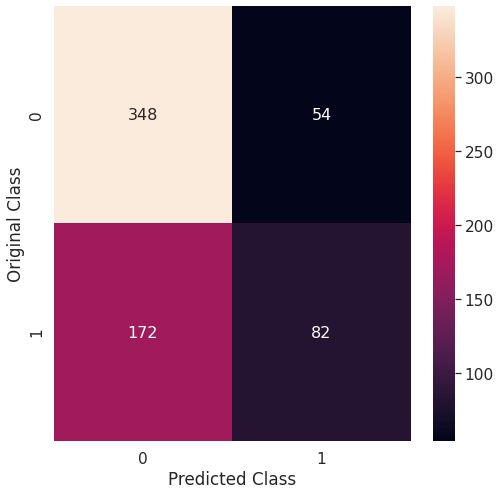

In [ ]:
RS_acc = accuracy_score(y_test,s_vec.predict(x_test))
y_pred=rsv.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVC',  'Decision Tree',
             'Random Forest',  'Gaussian','GridsearchRF','RandomRf'],
    'Score': [ log_acc,k_acc, s_acc, d_acc, r_acc, g_acc,GS_acc,RS_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest,0.698171
6,GridsearchRF,0.647866
0,Logistic,0.612805
2,SVC,0.612805
5,Gaussian,0.612805
7,RandomRf,0.612805
3,Decision Tree,0.573171
1,KNN,0.570122


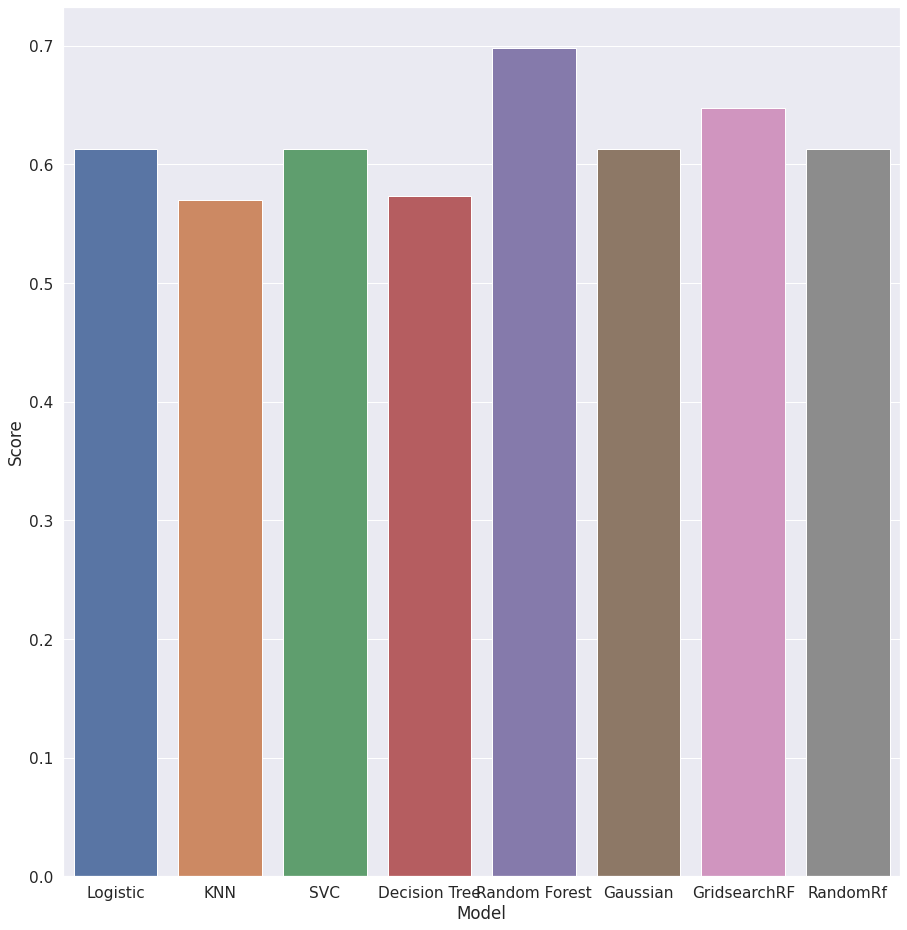

In [ ]:
plt.figure(figsize=(15,16))
sns.barplot(x="Model", y="Score", data=models)
plt.show()